<IPython.core.display.Javascript object>


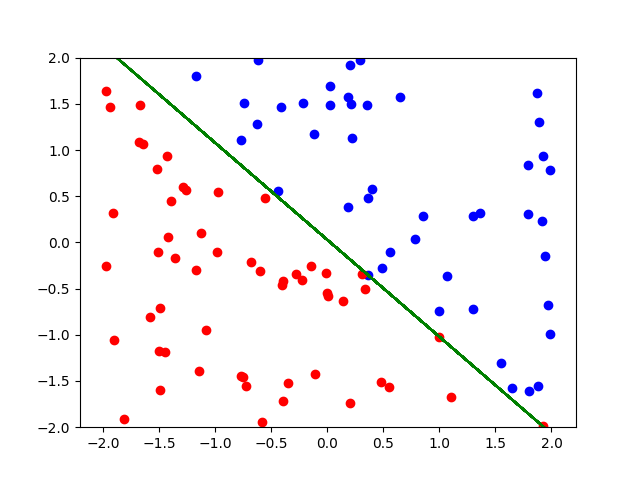

[[1.02335876 0.97608239]]
-0.025885354655666673


In [16]:
import numpy as np;
import matplotlib.pyplot as plt;
import matplotlib.animation as anime;


%matplotlib nbagg

fig = plt.figure ();
ims = [];


# date set
N = 100;
x = np.random.uniform (-2, 2, (N,2));
y = np.zeros (N);
markers = ["red", "blue"]
for idx in range (len(x)):
    
    y[idx] = 1 if (x[idx,0]+x[idx,1]>0) else -1;

    plt.scatter (x[idx,0], x[idx,1], c=markers[(int)((y[idx]+1)/2)]);
    
    
# Estimate parameters
beta = np.zeros ((1,2));
beta_0 = 0;
rho = 0.1;

xs = np.linspace (-2,2)

while True:
    M = 0;
    for idx in range (len (x)):
        predict_y = np.sign (beta.dot (x[idx,:]) + beta_0);
        if predict_y != y[idx]:
            beta = beta + rho * y[idx] * x[idx,:];
            beta_0 = beta_0 + rho * y[idx];
            
            # beta を大きさが√2になるよう正規化
            z = np.sqrt ((beta[0,0]**2 + beta[0,1]**2)/2);
            beta = beta / z;
            beta_0 = beta_0 / z;
            
            
            im = plt.plot (x, -(beta[0,0]*x + beta_0)/beta[0,1], 'g-');
            ax = plt.gca ();
            ax.set_ylim (-2,2);
            ims.append (im);
            
            #print ('no {} miss'.format(idx));
            M = M + 1;
            
        
    if M==0:
        for t in range (20):
            im = plt.plot (x, -(beta[0,0]*x + beta_0)/beta[0,1], 'g-');
            ims.append (im);
        break;

        
        
ani = anime.ArtistAnimation(fig, ims, interval=100, repeat=True)
plt.show()

print (beta)
print (beta_0)